In [1]:
# Import all necessary libraries.
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.special import expit
import math as m
import matplotlib.pyplot as plt

### Não se esqueçam de importar a classe LogisticRegression.

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando os dados de 2 classes.

In [4]:
# Number of examples.
N = 1000

# Create a 2-class dataset for classification with the specified centers.
centers = [[-5.0, 0], [0, 5.0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

### Plotando as 2 classes.

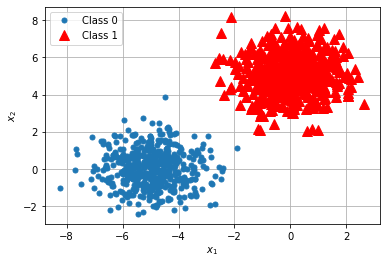

In [5]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

### Dividindo os dados em conjuntos de treinamento e validação.

In [6]:
# Split array into random train and validation subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

### Alterando as matrizes de atributos de treinamento e validação para que implementem o formato apropriado da função discriminante.

O formato apropriado é o de uma reta, conforme mostrado abaixo.

$$g(x) = a_0 + a_1x_1 + a_2x_2,$$

onde $a_0$ é o peso de bias e o atributo correspondente, $x_0$, é sempre feito igual a 1.

Em forma matricial, a função discriminante é definida como

$$g(\textbf{X}) = \textbf{Xa},$$

onde $\textbf{a}$ e $\textbf{X}$ são um vetor (com dimensão $K+1 \times 1$) e uma matriz (com dimensão $N \times K+1$), respectivamente.

In [7]:
# Add bias to feature matrix.
X_train = np.c_[np.ones((len(y_train), 1)), X_train]

# Add bias to feature matrix.
X_test = np.c_[np.ones((len(y_test), 1)), X_test]

### Treinando o classificador.

**OBSERVAÇÕES**: 

+ O parâmetro `penalty` é feito igual a `none` para desabilitar a regularização. Como já sabemos qual é o formato ótimo para a função discriminante, não é necessário regularizar o modelo.
+ O parâmetro `fit_intercept` habilita ou não a concatenção do vetor com todos valores iguais a `1` (i.e., vetor de *bias*) à matriz de atributos de entrada. Como nós concatenamos manualmente o vetor de *bias* na célula de código anterior, não é necessário que a classe faça isso e, portanto, configuramos `fit_intercept` com o valor `False`.
+ Se deixássemos o parâmetro `fit_intercept` com seu valor padrão, `True`, não precisaríamos concatenar o vetor do atributo de bias às matrizes originais de treinamento e teste, pois o objeto da classe faria isso automaticamente. 

In [8]:
# Instantiate Logistic classifier.
classifier = LogisticRegression(penalty='none', fit_intercept=False, random_state=seed)

# Train the model.
classifier.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, penalty='none', random_state=42)

### Calculando a acurácia do classificador.

In [9]:
# Calculate accuracy of class predictions.
y_pred = classifier.predict(X_test)

# Calculate accuracy of class predictions.
acc = accuracy_score(y_test, y_pred)

print('Acurácia:',acc)

Acurácia: 1.0


### Plotando as regiões de decisão.

**OBS:** Notem que a matriz de atributos criada para plotarmos as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

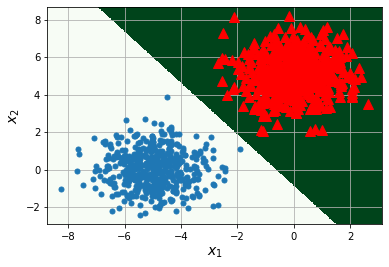

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

Z = classifier.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()

### Plotando a matriz de confusão.

A matriz de confusão apresenta a performance do classificador. Podemos extrair várias métricas dela, como veremos mais adiante.

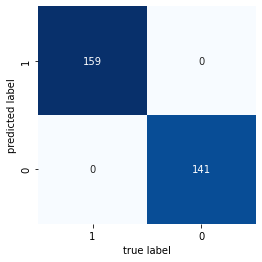

In [11]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['1','0'], yticklabels=['1','0'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()